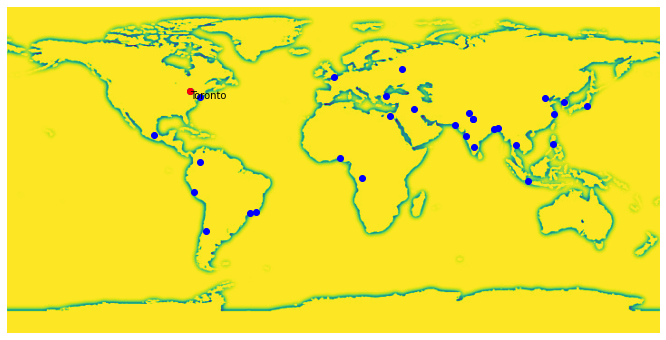

In [1]:
#DEFINING THE CITY CLASS

import matplotlib.pyplot as plt
import time
from IPython import display




class City:
    
    def __init__(self, country_code, name, region, population, latitude, longitude):
        self.country_code = country_code
        self.name = name
        self.region = region
        self.population = int(population) #mentioned in instructions that it must be an int
        self.latitude = float(latitude)
        self.longitude = float(longitude)
    
    def __str__(self):
        
        return self.name + "," + str(self.population) + "," + str(self.latitude) + "," + str(self.longitude)
    
    def get_population(self):
        return self.population
    
    def get_latitude(self): 
        return self.latitude
    
    def get_name(self):
        return self.name
    

    
# Performs the quicksort algorithm.

# Partition the sublist the_list[p ... r] so that the pivot
# (originally in the_list[r]) moves to the_list[q],
# all items in the_list[p ... q-1] are less than or equal to the pivot,
# and all items in the_list[q+1 ... r] are greater than the pivot.
# Return the index q where the pivot ends up.
def partition(the_list, p, r, compare_func):
    pivot = the_list[r]
    
    # Set up the indices i and j so that
    #    the_list[p ... i] contains items <= pivot,
    #    the_list[i+1 ... j-1] contains items > pivot, and
    #    the_list[j ... r-1] contains items not yet compared with the pivot.
    i = p - 1
    j = p
    while j < r:
        if compare_func(the_list[j], pivot):
            # Move this item into the section known to be <= pivot.
            i += 1
            (the_list[i], the_list[j]) = (the_list[j], the_list[i])
        j += 1
            
    # Get the pivot into the correct position.
    (the_list[i+1], the_list[r]) = (the_list[r], the_list[i+1])
    return i+1

# Sort the sublist the_list[p ... r] using the quicksort algorithm.
def quicksort(the_list, p, r, compare_func):
    if p < r:   # nothing to do if the sublist has fewer than 2 items
        q = partition(the_list, p, r, compare_func) # divide
        quicksort(the_list, p, q-1, compare_func)   # conquer smaller items
        quicksort(the_list, q+1, r, compare_func)   # conquer larger items

# Sort the_list by running quicksort on it.        
def sort(the_list, compare_func):
    quicksort(the_list, 0, len(the_list)-1, compare_func)

# Return True if city1 has the same or higher population than city2.
def compare_population(city1, city2):
    return city1.get_population() >= city2.get_population()

# Return True if city1 comes at or before city2 alphabetically.
def compare_name(city1, city2):
    return city1.get_name().lower() <= city2.get_name().lower()

# Return True if city1's latitude is less than or equal to city2's latitude.
def compare_latitude(city1, city2):
    return city1.get_latitude() <= city2.get_latitude()
    

# Driver Function

#Read data from the file
cities_file = open('world_cities.txt' , 'r')

#Cities is an array of cities objects. We will populate the array shortly 
cities = []

#populate the cities array with cities objects
for each_line in cities_file:
    data_after_split = each_line.split(",")
    
    
    #print("After splitting each line is")
    #print(data_after_split)
    
    
    #remove new line character present in last string. Last string in the data_after_split array
    data_after_split[len(data_after_split)-1] = data_after_split[len(data_after_split)-1].strip('\n')
    
    #print("After removing new line char data line is ")
    #print(data_after_split)
    
   
    
    #appending cities object in the cities array
    cities.append( City( *data_after_split ) ) # * picks each element of data_after_split array 
    #and calls City constructor with it
    
    #cities.append( City( data_after_split[0], data_after_split[1], data_after_split[2], 
    #                    data_after_split[3], data_after_split[4],data_after_split[5]) )



#Write a function to sort based on compare function and write data to a file

def write_to_file(file_name, compare_func):
    new_file = open(file_name, "a") #"a": means the texts will be inserted at the current file stream position, default at the end of the file.
    
    #file.writelines(list) expects a list as argument and writes the data in the list to the file
    
    #we only need to write city_name, population, latitute and longitude to file sorted based on the sorting attribute
    
    #lets sort the list first by calling sort() function provided in the assignment
    sort(cities, compare_func)
    
    #note that one of the most peculiar thing in the above call is that we are passing function as an argument
    #to another function. This is possible because functions are actually objects in Python and we can get
    #reference to them and pass that reference around in function calls
    #READ MORE HEREL: https://treyhunner.com/2020/01/passing-functions-as-arguments/
    
    #cities list is now sorted based on the sorting attribute mentioned in compare function
    #now write data to the file
    
    for each_city in cities:
        
        write_string = each_city.__str__() #__str__()is a func of city class. Returns string
        
        #print("write string is " + write_string)
        
        new_file.write(write_string + '\n') #'\n' is the newline character
    
    
    new_file.close()


write_to_file( "cities_alpha.txt" , compare_name ) #compare_name is reference to compare_population function

write_to_file( "cities_population.txt" , compare_population ) #compare_population is reference to compare_population function

write_to_file( "cities_latitude.txt" , compare_latitude ) #compare_latitude is reference to compare_population function


#NOW LETS DO THE ANIMATION


#Plot and animate

#small dot over each of the top 30 most populous cities along with the name of the city

#Read data from the cities_population.txt file
# Driver Function

#Read data from the file
cities_pop_file = open('cities_population.txt' , 'r')

#new list with cities population data
cities_pop = []

#populate the cities population array with cities data
for each_line in cities_pop_file:
    data_after_split = each_line.split(",")
    
    #remove new line character present in last string. Last string in the data_after_split array
    data_after_split[len(data_after_split)-1] = data_after_split[len(data_after_split)-1].strip('\n')   
    
    #appending cities object in the cities array
    
    cities_pop.append( ( data_after_split[0], data_after_split[1], data_after_split[2], data_after_split[3] )  )
    


#for elem in cities_pop:
#    print(elem)
    
# Convert a latitude and longitude to pixel locations.
# WIDTH & HEIGHT should be defined to be the size of the image (in pixels)
def longlat_to_pixel(latitude, longitude):
    center_x = int(round((WIDTH / 2) + (WIDTH / 2) * (longitude / 180)))
    center_y = HEIGHT - int(round((HEIGHT / 2) + (HEIGHT / 2) * (latitude / 90)))
    return (center_x, center_y)

WIDTH = 720 # image (world.png) width
HEIGHT = 360 # image height
DPI = 60 # display image at this dots-per-inch resolution

img = plt.imread("world.jpg") #read the image

cities_so_far = []

count = 0
for city in cities_pop:
    
    if (count == 30):
        break
    plt.figure(figsize=(WIDTH/DPI,HEIGHT/DPI))
    plt.imshow(img) # Display the image
    plt.axis('off')
    x , y = longlat_to_pixel(float(city[2]), float(city[3]))
    
    cities_so_far.append((x,y)) #append the Tuple
    
    for loc in cities_so_far:
        plt.plot(loc[0], loc[1], 'bo')
    
    plt.plot(x, y, 'ro') # plot one blue data point
    plt.text(x, y+8, city[0])
    
    plt.show()
    display.clear_output(wait=True)
    #plt.plot(x, y, 'bo') # plot one blue data point
    time.sleep(0.5)
    count += 1
    


        
        
    
    